# File to plot sims fields

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def read_fields(dir,time):
    dt = np.loadtxt( dir + '/' + time + '/particles.dat' )

    x= dt[:,0]
    y= dt[:,1]
    r= np.sqrt( x**2 + y**2)
    vol= dt[:,3]
    w= dt[:,4]
    p= dt[:,9]
    ux=dt[:,5]
    uy=dt[:,6]
    I=dt[:,11]
    u = np.sqrt( ux**2 + uy**2)
    
    return x, y , r, p, u , vol , I, w


In [3]:
def vels_G_1( r ) :
    l = 0.2
        
    x = r/l
    
    if x > 2 :
        return 0
    
    if x > 1 :
        return 2 -  x

    return x


vels_G = np.vectorize( vels_G_1 ,  otypes=[np.float])

In [4]:
def press_G_1( r ) :
    l = 0.2
    
    x = r/l

    if x > 2 :
        return 0
    
    if x > 1 :
        return 4*np.log( x / 2) - 4 * ( x - 2 ) + 0.5 * ( x**2 - 4)

    return -4*np.log(2) + 2.5  + 0.5*(x**2 - 1 )


press_G = np.vectorize( press_G_1 ,  otypes=[np.float])

In [17]:
#dir = 'dG_no_p_N400'
dir = 'rev'

x, y , r, p, u , vol , I , w=  read_fields( dir , '90')

In [18]:
x1, y1 , r1, p1, u1 , vol1 , I1 , w1 =  read_fields( dir , '1')

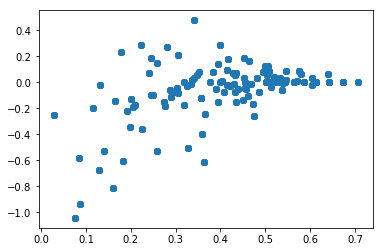

In [20]:
plt.plot( r, p , 'o'  ) #  , r , press_G( r ), 'x')

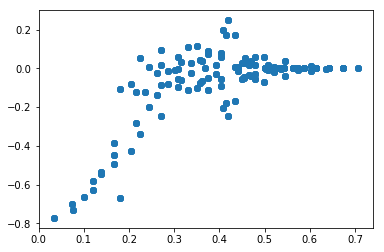

In [8]:
plt.plot( r1 , p1 , 'o'  )

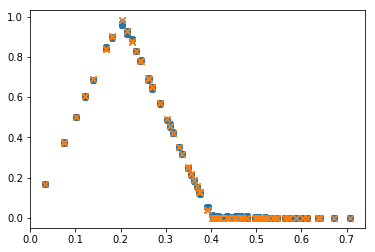

In [9]:
plt.plot( r , u, 'o' , r , vels_G( r ), 'x')

In [10]:
dir = 'press_PPE'
#dir = 'press'
x, y , r, p, u , vol , I =  read_fields( dir , '160')

ValueError: too many values to unpack (expected 7)

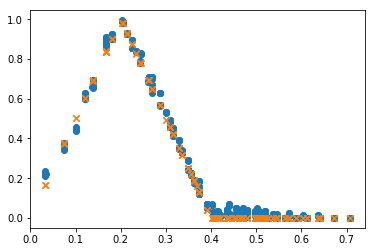

In [11]:
plt.plot( r , u, 'o' , r , vels_G( r ), 'x')

In [26]:
x1, y1 , r1, p1, u1 , vol1 , I1 =  read_fields( dir , '22')

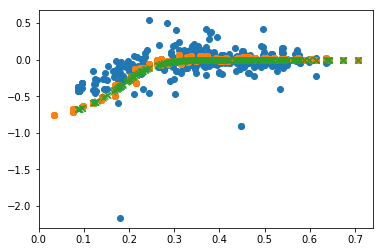

In [27]:
plt.plot( r , p, 'o' , r1 , p1 , 'o' , r , press_G( r ), 'x')

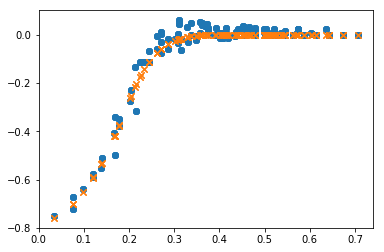

In [28]:
plt.plot( r1 , p1 , 'o' , r1 , press_G( r1 ), 'x')

## positions and trajectories

In [21]:
dir = 'rev'
traj = np.loadtxt( dir + '/traj.dat' )

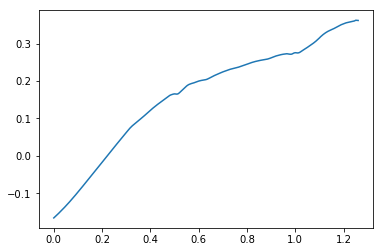

In [22]:
plt.plot( traj[:,0] , traj[:,1])

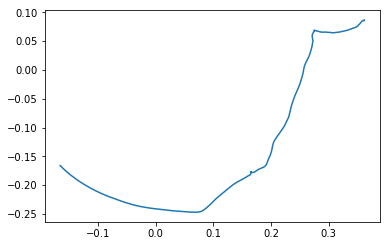

In [23]:
plt.figure(figsize=( 6 , 6))
plt.axes().set_aspect('equal')
plt.plot( traj[:,1] , traj[:,2])

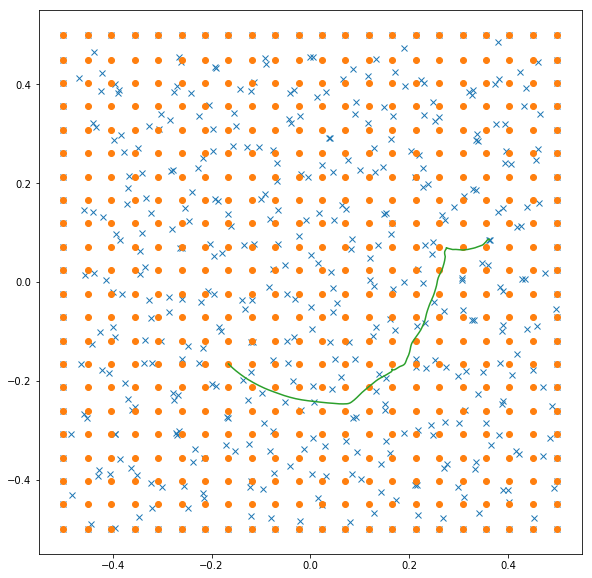

In [27]:
x, y , r, p, u , vol , I ,w =  read_fields( dir , '252')
x0, y0 , r0, p0, u0 , vol0 , I0 ,w0 =  read_fields( dir , '0')

plt.figure(figsize=(10,10))

plt.axes().set_aspect('equal')

plt.plot( x, y, 'x',  x0 , y0 , 'o', traj[:,1] , traj[:,2])

In [17]:
dir = 'press_PPE'
traj = np.loadtxt( dir + '/traj.dat' )

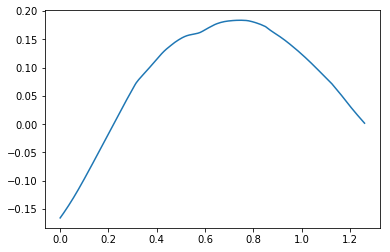

In [18]:
plt.plot( traj[:,0] , traj[:,1])

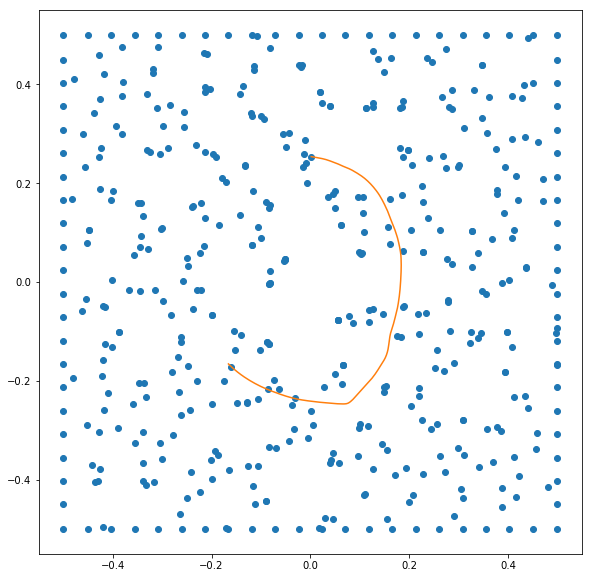

In [19]:
x, y , r, p, u , vol , I =  read_fields( dir , '252')
plt.figure(figsize=(10,10))

plt.axes().set_aspect('equal')

plt.plot( x, y, 'o', traj[:,1] , traj[:,2])

In [20]:
dir = 'dG'
traj = np.loadtxt( dir + '/traj.dat' )

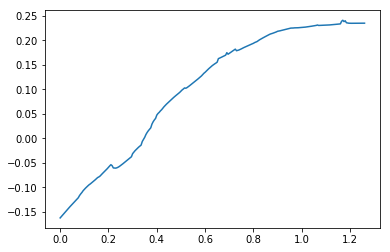

In [21]:
plt.plot( traj[:,0] , traj[:,1])

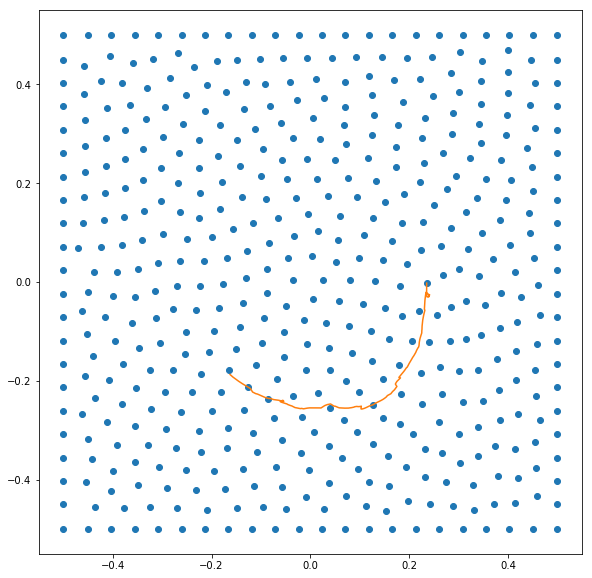

In [22]:
x, y , r, p, u , vol , I =  read_fields( dir , '252')
plt.figure(figsize=(10,10))

plt.axes().set_aspect('equal')

plt.plot( x, y, 'o', traj[:,1] , traj[:,2])